## Load data

In [1]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-02-19 13:50:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2021-02-19 13:50:33 (19.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('loan_train.csv')
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [5]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

In [6]:
df['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

## Preprocessing

In [7]:
#Convert to date time object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


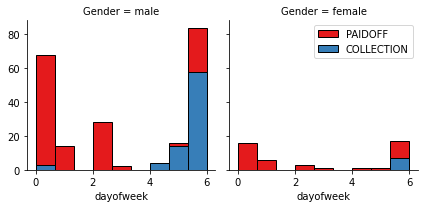

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [9]:
#transform data type into dummy variables
transform_df=pd.get_dummies(df[['education','Gender']])
transform_df.head()

,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,0,0,0,1,0,1
3,0,0,0,1,1,0
4,0,0,0,1,0,1


In [10]:
#drop multicollinear variables
transform_df.drop(['Gender_female','education_Master or Above'],axis=1,inplace=True)
transform_df.head()

,education_Bechalor,education_High School or Below,education_college,Gender_male
0,0,1,0,1
1,1,0,0,0
2,0,0,1,1
3,0,0,1,0
4,0,0,1,1


In [11]:
df.drop(['Unnamed: 0','Unnamed: 0.1','education','Gender'],axis=1,inplace=True)
transform_df.rename(columns={'Gender_male':'Gender'},inplace=True)
transform_df.head()

,education_Bechalor,education_High School or Below,education_college,Gender
0,0,1,0,1
1,1,0,0,0
2,0,0,1,1
3,0,0,1,0
4,0,0,1,1


In [12]:
df=pd.concat([df,transform_df],axis=1)
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,dayofweek,education_Bechalor,education_High School or Below,education_college,Gender,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,3,0,1,0,1,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,3,1,0,0,0,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,3,0,0,1,1,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,4,0,0,1,0,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,4,0,0,1,1,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [14]:
features=['Principal','terms','age','education_Bechalor','education_High School or Below','education_college','Gender','weekend']
X = df[features]
Y = df['loan_status']
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.38170062,  1.13639374,
        -0.86968108,  0.42056004, -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  2.61985426, -0.87997669,
        -0.86968108, -2.37778177, -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055, -0.38170062, -0.87997669,
         1.14984679,  0.42056004, -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188, -0.38170062, -0.87997669,
         1.14984679, -2.37778177,  0.82934003],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.38170062, -0.87997669,
         1.14984679,  0.42056004,  0.82934003]])

## train_test_split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

## Build KNN Classifier with GridSearchCV

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_parameters={'n_neighbors':range(3,15)}
knn_clf=GridSearchCV(KNeighborsClassifier(),knn_parameters,cv=10,scoring='accuracy')
knn_clf.fit(x_train,y_train)
print('best number of K is',knn_clf.best_params_)

best number of K is {'n_neighbors': 7}


## KNN Prediction

In [17]:
#use test dataset test its generalization ability on best model
yhat_knn=knn_clf.best_estimator_.predict(x_test)
yhat_knn

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

## Build Decision Tree classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion="entropy",max_depth = 4)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## DecisionTree Prediction

In [19]:
#use test dataset test its generalization ability on best model
yhat_dt=dt_clf.predict(x_test)
yhat_dt

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Build SVM Classifier

In [20]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train) 

SVC()

## SVM Prediction

In [21]:
yhat_svm=svm_clf.predict(x_test) 
yhat_svm

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Build Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr_clf =LogisticRegression(C=0.01)
lr_clf.fit(x_train,y_train)

LogisticRegression(C=0.01)

## Logistic Regression Prediction

In [23]:
yhat_lr=lr_clf.predict(x_test)
yhat_prob=lr_clf.predict_proba(x_test)
yhat_prob

array([[0.34684947, 0.65315053],
       [0.29471163, 0.70528837],
       [0.17787844, 0.82212156],
       [0.20143612, 0.79856388],
       [0.18315069, 0.81684931],
       [0.18487421, 0.81512579],
       [0.3310149 , 0.6689851 ],
       [0.32066455, 0.67933545],
       [0.20143612, 0.79856388],
       [0.3305752 , 0.6694248 ],
       [0.19767283, 0.80232717],
       [0.33344152, 0.66655848],
       [0.1357204 , 0.8642796 ],
       [0.20539016, 0.79460984],
       [0.28083009, 0.71916991],
       [0.14086637, 0.85913363],
       [0.36849597, 0.63150403],
       [0.1709724 , 0.8290276 ],
       [0.33869843, 0.66130157],
       [0.18682978, 0.81317022],
       [0.27688694, 0.72311306],
       [0.33082841, 0.66917159],
       [0.35760011, 0.64239989],
       [0.31126966, 0.68873034],
       [0.24926176, 0.75073824],
       [0.35220607, 0.64779393],
       [0.35489848, 0.64510152],
       [0.22560346, 0.77439654],
       [0.34134199, 0.65865801],
       [0.13088364, 0.86911636],
       [0.

## Evaluation with test dataset

In [24]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
test_df = pd.read_csv('loan_test.csv')
test_df.head()

--2021-02-19 13:50:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-02-19 13:50:38 (111 MB/s) - ‘loan_test.csv’ saved [3642/3642]



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [25]:
## Preprocessing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Y = test_df['loan_status']
test_Y=test_Y.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0])
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

### KNN Evaluation

In [26]:
replace_dict = {'PAIDOFF':1,"COLLECTION":0}
yhat_knn = knn_clf.best_estimator_.predict(test_X)
yhat_knn =[replace_dict[i] if i in replace_dict else i for i in yhat_knn]
print('jaccard_score of KNN is %.2f'%jaccard_score(test_Y,yhat_knn))
print('f1_score of KNN is %.2f'%f1_score(test_Y,yhat_knn,average='weighted'))

jaccard_score of KNN is 0.70
f1_score of KNN is 0.61


### DecisionTree Evaluation

In [27]:
yhat_dt = dt_clf.predict(test_X)
yhat_dt=[replace_dict[i] if i in replace_dict else i for i in yhat_dt]
print('jaccard_score of DecsionTree is %.2f'%jaccard_score(test_Y,yhat_dt))
print('f1_score of DecsionTree is %.2f'%f1_score(test_Y,yhat_dt,average='weighted'))

jaccard_score of DecsionTree is 0.51
f1_score of DecsionTree is 0.55


### SVM Evaluation

In [28]:
yhat_svm=svm_clf.predict(test_X) 
yhat_svm=[replace_dict[i] if i in replace_dict else i for i in yhat_svm]
print('jaccard_score of SVM is %.2f'%jaccard_score(test_Y,yhat_svm))
print('f1_score of SVM is %.2f'%f1_score(test_Y,yhat_svm,average='weighted'))

jaccard_score of SVM is 0.68
f1_score of SVM is 0.63


### Logistic Regression Evaluation

In [29]:
yhat_lr=lr_clf.predict(test_X)
yhat_lr_prob = lr_clf.predict_proba(test_X)
yhat_lr=[replace_dict[i] if i in replace_dict else i for i in yhat_lr]
print('jaccard_score of Logistic Regression is %.2f'%jaccard_score(test_Y,yhat_lr))
print('f1_score of Logistic Regression is %.2f'%f1_score(test_Y,yhat_lr,average='weighted'))
print('log_loss of Logistic Regression is %.2f'%log_loss(test_Y,yhat_lr_prob))

jaccard_score of Logistic Regression is 0.74
f1_score of Logistic Regression is 0.63
log_loss of Logistic Regression is 0.59


# Report

| Algorithm          | Jaccard | F1-score | LogLoss  |
|------------------------|---------|----------|----------|
| KNN              | 0.70   | 0.61    | NA     |
| Decision Tree       | 0.51   | 0.55    | NA     |
| SVM              | 0.68   | 0.63    | NA     |
| LogisticRegression    | 0.74   | 0.63    | 0.59    |